# ***Data Science Intern @ LetsGrowMore***
# ***Author : Dhivya S***
#***Advance Level 03***
# ***1)Develop A Neural Network That Can Read Handwriting:***
### ***Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find here***

In [1]:
!pip install tensorflow

## ***Importing Required Libraries***

In [2]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

## ***Load the Dataset***

In [4]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


## ***Reshaping the trainning and testing dataset***

In [5]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

## ***Normalize the value of pixels in images***

In [6]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

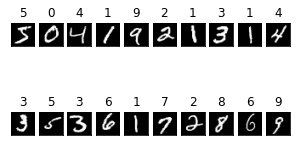

In [7]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

# ***Determine the shape of input image***

In [8]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

# ***Defining the model***

In [9]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


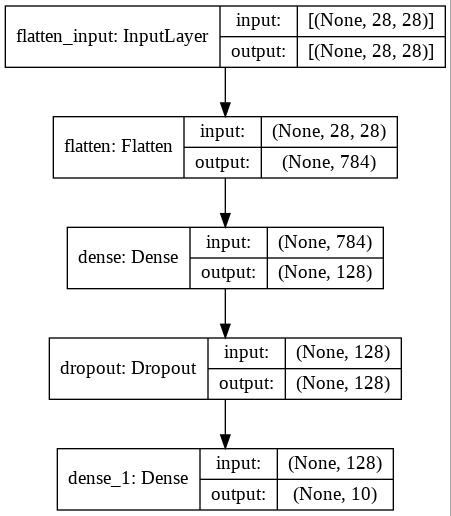

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

In [12]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.3529508 , -0.31769088,  0.2697999 , -0.74916357,  0.24881572,
        -0.5597073 ,  0.13097113, -0.0683773 ,  0.15851894,  0.46022367]],
      dtype=float32)

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.07099361, 0.07354149, 0.13233551, 0.04776901, 0.12958752,
        0.05773326, 0.11518182, 0.09436435, 0.11839893, 0.16009451]],
      dtype=float32)

# ***Compling The Model***

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

# ***Train the model***

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0732 - accuracy: 0.9770


# ***Model Evaluation***

In [16]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07562007755041122, 0.975600004196167]

# ***Probablity of the model***

In [17]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.4616375e-07, 7.2130328e-09, 2.4131095e-05, 4.1120677e-04,
        9.4125072e-12, 1.4159100e-06, 1.5974276e-11, 9.9956053e-01,
        8.0236157e-07, 1.5224218e-06],
       [5.4347529e-06, 3.4610934e-05, 9.9995172e-01, 4.9104337e-06,
        6.5878162e-13, 6.2996932e-08, 7.5917205e-07, 2.6148181e-11,
        2.4887665e-06, 4.2518386e-10],
       [3.3572815e-07, 9.9912602e-01, 3.5275848e-04, 1.7152918e-06,
        2.0375715e-04, 1.0947491e-05, 4.2696520e-06, 2.3221158e-04,
        6.7635381e-05, 4.2433780e-07],
       [9.9984860e-01, 1.4998497e-10, 3.5747384e-05, 8.8711937e-07,
        2.6627470e-07, 2.2972697e-06, 9.7817574e-05, 9.0488857e-06,
        1.0086195e-07, 5.2964365e-06],
       [2.2098932e-06, 3.7526910e-09, 7.7044997e-06, 3.5991135e-08,
        9.9410325e-01, 4.7351543e-07, 2.6315408e-06, 3.4259843e-05,
        9.1264019e-06, 5.8403206e-03]], dtype=float32)>

# ***Testing the model***

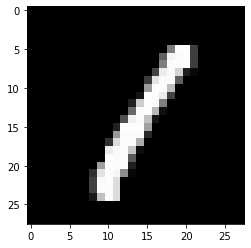

In [18]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [19]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1


# ***Thank You @ LetsGrowMore***